In [2]:
source("/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/libraries_analysis.R")
source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/libraries_visuals.R')
source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/R_functions/hla_functions.R')



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract



Attaching package: ‘arrow’


The following object is masked from ‘package:magrittr’:

    is_in


The following object is masked from ‘package:utils’:

    timestamp


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


The following objects are masked from ‘package:data.table’:

    dcast, melt


Loading required package: dtplyr

Loading required package: patchwork


Attaching package: ‘DescTools’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following o

## Preprocessing HLA df of healthy donor and bind_rows with IBD

In [3]:
hla_ibd <- read.csv('../data/hla/HLA_of_ibd_samples.tsv', sep = '\t') %>%
    mutate(sample_name = gsub('sample_', 'I', sample_name)) %>%
    rename(patient_id = sample_name) 

In [5]:
hla_healthy <- read.csv('../data/hla/HLA_of_healthy_samples.tsv', sep = '\t') %>%
    mutate(sample_Id = gsub('sample_', 'H', sample_Id)) %>%
    rename(patient_id = sample_Id)


In [6]:
hla <- bind_rows(hla_healthy, hla_ibd)

In [7]:
ids_in_cdr3 <- read.table('../data/ids_in_cdr3.txt') %>% pull(V1)

In [56]:
hla <- bind_rows(hla_healthy, hla_ibd) %>% filter(!(patient_id %in% ids_low_depths)) %>%
    filter(patient_id %in% ids_in_cdr3)

In [83]:
hla_duplicated <- hla %>% 
    group_by(across(- patient_id)) %>%
    mutate(patient_id = paste(unique(patient_id), collapse = ', ')) %>% 
    ungroup() %>%
    distinct() %>%
    filter(nchar(patient_id)>5)
hla_duplicated

A.1,A.2,B.1,B.2,C.1,C.2,DPA1.1,DPA1.2,DPB1.1,DPB1.2,⋯,DQB1.2,DRB1.1,DRB1.2,DRB3.1,DRB3.2,DRB4.1,DRB4.2,DRB5.1,DRB5.2,patient_id
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
02:01,03:01,07:02,35:01,04:01,07:02,01:03,01:03,04:01,04:02,⋯,06:02,11:01,15:01,00:00,02:02,00:00,00:00,00:00,01:01,"H160, I7"
02:01,03:01,07:02,40:01,03:04,07:02,01:03,01:03,03:01,04:01,⋯,06:04,13:02,15:01,00:00,03:01,00:00,00:00,00:00,01:01,"H225, I770, I1003, I1390"
01:01,02:01,07:02,08:01,07:01,07:02,01:03,01:03,04:01,04:01,⋯,06:02,03:01,15:01,00:00,01:01,00:00,00:00,00:00,01:01,"H251, I161"
01:01,23:01,08:01,44:03,04:01,07:01,01:03,02:01,01:01,01:01,⋯,02:01,03:01,07:01,00:00,01:01,00:00,01:01,00:00,00:00,"H281, I1108"
01:01,02:01,08:01,44:02,05:01,07:01,01:03,01:03,01:01,04:01,⋯,03:01,03:01,04:01,00:00,01:01,00:00,01:01,00:00,00:00,"H425, I536"
01:01,02:01,07:02,57:01,06:02,07:02,01:03,01:03,04:01,04:01,⋯,06:02,07:01,15:01,00:00,00:00,00:00,01:01,00:00,01:01,"H626, H711"
01:01,03:01,07:02,08:01,07:01,07:02,01:03,01:03,04:01,04:01,⋯,06:02,03:01,15:01,00:00,01:01,00:00,00:00,00:00,01:01,"H689, I925"
01:01,01:01,08:01,08:01,07:01,07:01,01:03,01:03,01:01,01:01,⋯,02:01,03:01,03:01,01:01,01:01,00:00,00:00,00:00,00:00,"H746, I95"
01:01,03:01,07:02,08:01,07:01,07:02,01:03,01:03,01:01,04:01,⋯,06:02,03:01,15:01,00:00,01:01,00:00,00:00,00:00,01:01,"I34, I1154"


In [84]:
write_tsv(hla_duplicated, '../data/hla_duplicated_healthy_and_ibd.tsv')

In [98]:
hla_duplicated_with_ids <- hla_duplicated %>% rowwise() %>%
    mutate(patient_id = strsplit(patient_id,','),
          ids_to_keep = list(sample(patient_id, 1)),
          ids_to_remove = list(setdiff(patient_id, ids_to_keep)))

In [100]:
hla_duplicated_with_ids

A.1,A.2,B.1,B.2,C.1,C.2,DPA1.1,DPA1.2,DPB1.1,DPB1.2,⋯,DRB1.2,DRB3.1,DRB3.2,DRB4.1,DRB4.2,DRB5.1,DRB5.2,patient_id,ids_to_keep,ids_to_remove
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
02:01,03:01,07:02,35:01,04:01,07:02,01:03,01:03,04:01,04:02,⋯,15:01,00:00,02:02,00:00,00:00,00:00,01:01,"H160, I7",H160,I7
02:01,03:01,07:02,40:01,03:04,07:02,01:03,01:03,03:01,04:01,⋯,15:01,00:00,03:01,00:00,00:00,00:00,01:01,"H225 , I770 , I1003, I1390",I1003,"H225 , I770 , I1390"
01:01,02:01,07:02,08:01,07:01,07:02,01:03,01:03,04:01,04:01,⋯,15:01,00:00,01:01,00:00,00:00,00:00,01:01,"H251 , I161",I161,H251
01:01,23:01,08:01,44:03,04:01,07:01,01:03,02:01,01:01,01:01,⋯,07:01,00:00,01:01,00:00,01:01,00:00,00:00,"H281 , I1108",H281,I1108
01:01,02:01,08:01,44:02,05:01,07:01,01:03,01:03,01:01,04:01,⋯,04:01,00:00,01:01,00:00,01:01,00:00,00:00,"H425 , I536",H425,I536
01:01,02:01,07:02,57:01,06:02,07:02,01:03,01:03,04:01,04:01,⋯,15:01,00:00,00:00,00:00,01:01,00:00,01:01,"H626 , H711",H626,H711
01:01,03:01,07:02,08:01,07:01,07:02,01:03,01:03,04:01,04:01,⋯,15:01,00:00,01:01,00:00,00:00,00:00,01:01,"H689 , I925",I925,H689
01:01,01:01,08:01,08:01,07:01,07:01,01:03,01:03,01:01,01:01,⋯,03:01,01:01,01:01,00:00,00:00,00:00,00:00,"H746, I95",I95,H746
01:01,03:01,07:02,08:01,07:01,07:02,01:03,01:03,01:01,04:01,⋯,15:01,00:00,01:01,00:00,00:00,00:00,01:01,"I34 , I1154",I1154,I34


In [103]:
ids_to_remove <- unlist(pull(hla_duplicated_with_ids, ids_to_remove))
write.table(ids_to_remove, '../data/ids_to_remove_duplicates.txt', col.names = FALSE, row.names = FALSE, quote = FALSE)

In [18]:
hla_unique <- hla %>% select(-c(patient_id, DRB3.1, DRB3.2,	DRB4.1,	DRB4.2,	DRB5.1,	DRB5.2)) %>% distinct()

In [19]:
hla_all <- hla %>% select(-c(patient_id, DRB3.1,DRB3.2,	DRB4.1,	DRB4.2,	DRB5.1,	DRB5.2))

In [27]:
dulicated <- hla[duplicated(hla_all),]
duplicated_ids <- pull(dulicated, patient_id)

In [28]:
duplicated_ids

[1] "H711"  "I7"    "I95"   "I161"  "I229"  "I314"  "I347"  "I398"  "I436" 
[10] "I536"  "I551"  "I556"  "I633"  "I644"  "I651"  "I738"  "I770"  "I800" 
[19] "I829"  "I901"  "I925"  "I929"  "I1003" "I1057" "I1072" "I1104" "I1108"
[28] "I1154" "I1232" "I1277" "I1292" "I1365" "I1390"

### HLA of IBD patients

In [173]:
duplicated_ids <- unlist(duplicated_ids)

In [13]:
hla_features <- hla  %>% 
    pivot_longer(cols = (- 'patient_id'), names_to = 'genes', values_to = 'allele') %>%     
    separate(genes, into = c('gene', 'gene_copy'), sep = '\\.', remove = TRUE) %>%
    mutate(allele = paste0(gene,'*', allele)) %>% 
    dplyr::select(-gene_copy) %>%
    distinct() %>%
    group_by(patient_id, gene) %>%
    mutate(homo_hetero = ifelse((length(allele) == 1), 2, 1)) %>%
    ungroup() %>%
    filter(!grepl('00:00', allele))

write_tsv(hla_features, '../data/hla/hla_features.tsv')

In [26]:
#------------uploading patients data--------

hla_features <- hla_healthy  %>% 
    pivot_longer(cols = (- 'patient_id'), names_to = 'genes', values_to = 'allele') %>%     
    separate(genes, into = c('gene', 'gene_copy'), sep = '\\.', remove = TRUE) %>%
    mutate(allele = paste0(gene,'*', allele)) %>% 
    select(-gene_copy) %>%
    distinct() %>%
    group_by(patient_id, gene) %>%
    mutate(homo_hetero = ifelse((length(allele) == 1), 2, 1)) %>%
    ungroup()


# Remove rows that contain the substring '00:00'
hla_features <- hla_features %>% filter(!apply(., 1, contains_substring))

write_tsv(hla_features, '../data/healthy_hla_features.tsv')

In [7]:
ibd_hla_features <- read_tsv('../data/ibd_hla_features.tsv')

Rows: 18730 Columns: 4
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): patient_id, gene, allele
dbl (1): homo_hetero

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
healthy_hla_features <- read_tsv('../data/healthy_hla_features.tsv')
hla_features <- bind_rows(healthy_hla_features, ibd_hla_features)

Rows: 13590 Columns: 4
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): patient_id, gene, allele
dbl (1): homo_hetero

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
write_tsv(hla_features, '../data/hla_features_wo_duplicates_healthy_and_ibd.tsv')

### Visualisation of healthy and IBD data allele frequencies

In [5]:
options(repr.plot.width=40, repr.plot.height=12)


A <- ggplot(hla_frequencies %>% filter(gene == 'A') %>% mutate(allele=factor(allele, levels=allele)), aes(x=allele, y= freq)) +
  geom_bar(stat = "identity", position = "dodge2") +
  coord_flip() +
  theme_light()
B <- ggplot(hla_frequencies %>% filter(gene == 'B') %>% mutate(allele=factor(allele, levels=allele)), aes(x=allele, y= freq)) +
  geom_bar(stat = "identity", position = "dodge2") +
  coord_flip() +
  theme_light()   
C <- ggplot(hla_frequencies %>% filter(gene == 'C') %>% mutate(allele=factor(allele, levels=allele)), aes(x=allele, y= freq)) +
  geom_bar(stat = "identity", position = "dodge2") +
  coord_flip() +
  theme_light()

save_plot(paste0('../plots/class_I_TRB.jpg'),
  plot_grid(A, B, C, labels=c("A", "B", "C"), ncol = 3, nrow = 1))


### the same but with facet_wrap()

In [7]:
hla_plot <- ggplot(hla_frequencies %>% filter(!gene %in% c("A", "B", "C")) %>% mutate(allele=factor(allele, levels=allele)), aes(x=allele, y= freq)) +
  geom_bar(stat = "identity", position = "dodge2") +
  coord_flip() +
  theme_light() +
  facet_wrap(~gene, scales = 'free')
save_plot('../plots/hla_II_DeWitt.jpg', hla_plot, ncol = 2, nrow = 3, base_height = 5)



### Visualisation HLA freq in healthy and IBD dataset comparing with the population

In [8]:
hla_plot <- ggplot(hla_frequencies_both, 
                   aes(x=factor(allele, level = unique(allele)), y= freq, fill = dataset)) +
  geom_bar(stat = "identity", position = "dodge2") +
  labs(x= "allele") +
  coord_flip() +
  theme_light() +
  facet_wrap(~gene, scales = 'free')
save_plot('../plots/hlas_both.jpg', hla_plot, ncol = 3, nrow = 3)

ERROR: Error in eval(expr, envir, enclos): object 'hla_frequencies_both' not found


In [9]:
hla_plot <- ggplot(hlas_variation_with_gene_col %>% filter(gene %in% c("A", "B", "C")), aes(x=position, y= n_variat, fill = allele)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_discrete(guide = 'none') +
  ggtitle("HLA allele variations position-wise") +
  xlab("") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
   

ggsave(paste0('../plots/',gene_name,'variations_aa_DeWitt.jpg'),hla_plot)




ERROR: Error in eval(expr, envir, enclos): object 'hlas_variation_with_gene_col' not found


### Sankey plot of HLA

In [39]:
head(hla_patients_site_variation) 

,site,gene,allele,aa,ref_aa,change,variat,n_variat,patient_id,homo_hetero
,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>
1,114,A,A*03:01,R,R,0,R H Q E,3,2,1
2,114,A,A*03:01,R,R,0,R H Q E,3,3,1
3,114,A,A*03:01,R,R,0,R H Q E,3,7,1
4,114,A,A*03:01,R,R,0,R H Q E,3,12,1
5,114,A,A*03:01,R,R,0,R H Q E,3,19,2
6,114,A,A*03:01,R,R,0,R H Q E,3,22,1


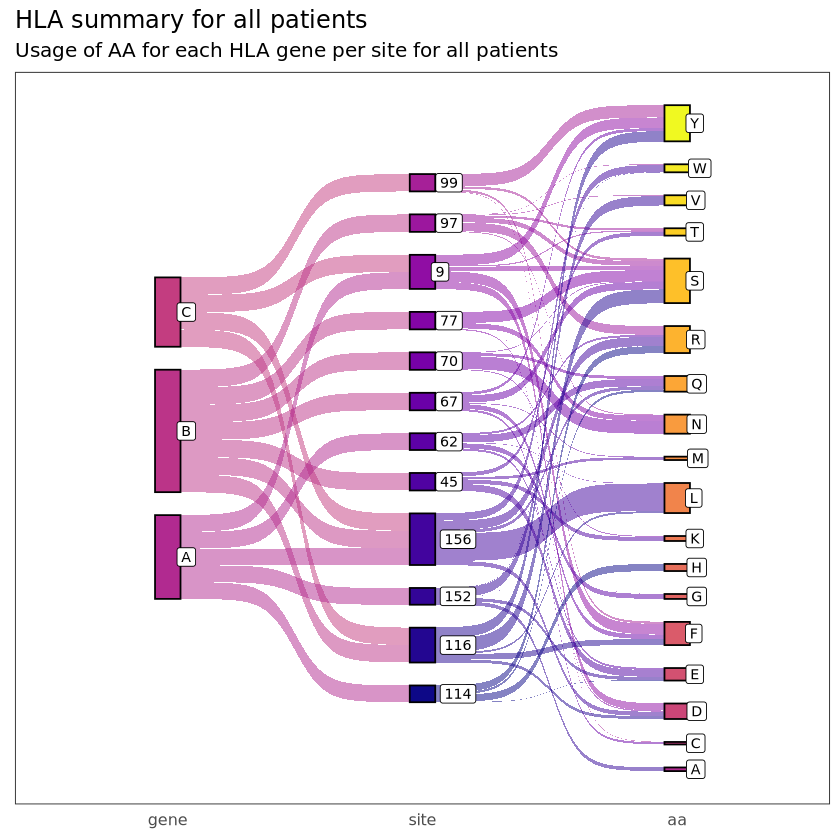

In [40]:

hla_for_sankey <- hla_patients_site_variation %>% 
    select(gene, site, aa) %>%
    filter((gene %in% c('A', 'B', 'C'))) %>%
    group_by(gene, site, aa) %>% 
    count() %>% 
    mutate(list_n = list(seq(n))) %>% 
    select(c(gene, site, aa, list_n))  %>% 
    unnest(list_n) %>% 
    ungroup() %>%
    arrange(site)

hla_for_sankey_long <- hla_for_sankey %>% select(gene, site, aa) %>% make_long(gene, site, aa)

pl <- ggplot(hla_for_sankey_long, aes(x = x, 
           next_x = next_x, 
           node = node, 
           next_node = next_node, 
           label = node,
           fill = factor(node)))
pl <- pl + geom_sankey(flow.alpha = 0.5
                      , node.color = "black"
                      ,show.legend = FALSE)
pl <- pl + geom_sankey_label(size = 3, color = "black", fill= "white", hjust = -0.5)
pl <- pl + theme_bw()
pl <- pl + theme(legend.position = "none")
pl <- pl + theme(axis.title = element_blank()
                  , axis.text.y = element_blank()
                  , axis.ticks = element_blank()  
                  , panel.grid = element_blank())
pl <- pl + scale_fill_viridis_d(option = "plasma")
pl <- pl + labs(title = "HLA summary for all patients", 
                subtitle = "Usage of AA for each HLA gene per site for all patients", 
                #caption = "Evgeniya Lokes",
                fill = 'Nodes')

pl
ggsave('../plots/trb_hla_i_sankey.jpg',pl, width = 5, height = 5)

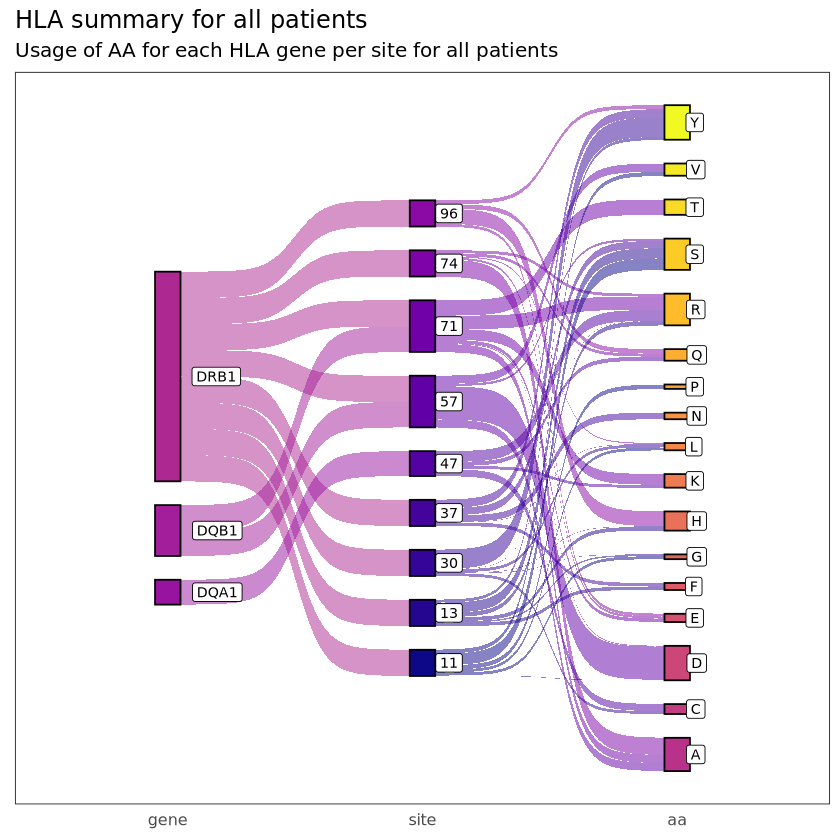

In [41]:
hla_for_sankey <- hla_patients_site_variation %>% 
    select(gene, site, aa) %>%
    filter(!(gene %in% c('A', 'B', 'C'))) %>%
    group_by(gene, site, aa) %>% 
    count() %>% 
    mutate(list_n = list(seq(n))) %>% 
    select(c(gene, site, aa, list_n))  %>% 
    unnest(list_n) %>% 
    ungroup() %>%
    arrange(site)

hla_for_sankey_long <- hla_for_sankey %>% select(gene, site, aa) %>% make_long(gene, site, aa)

pl <- ggplot(hla_for_sankey_long, aes(x = x, 
           next_x = next_x, 
           node = node, 
           next_node = next_node, 
           label = node,
           fill = factor(node)))
pl <- pl + geom_sankey(flow.alpha = 0.5
                      , node.color = "black"
                      ,show.legend = FALSE)
pl <- pl + geom_sankey_label(size = 3, color = "black", fill= "white", hjust = -0.5)
pl <- pl + theme_bw()
pl <- pl + theme(legend.position = "none")
pl <- pl + theme(axis.title = element_blank()
                  , axis.text.y = element_blank()
                  , axis.ticks = element_blank()  
                  , panel.grid = element_blank())
pl <- pl + scale_fill_viridis_d(option = "plasma")
pl <- pl + labs(title = "HLA summary for all patients", 
                subtitle = "Usage of AA for each HLA gene per site for all patients", 
                #caption = "Evgeniya Lokes",
                fill = 'Nodes')

pl
ggsave('../plots/trb_hla_ii_sankey.jpg',pl, width = 5, height = 5)

## Phenotype ~ HLA modeling

In [5]:
hla_var <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/hla/all_hla_variations_long.tsv')
phenotype <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/phenotypes.tsv')
hla_var <- merge(hla_var, phenotype, by = 'patient_id')

cdr3qtls <- c('DRB1_13', 'DRB1_32', 'DRB1_37', 'DRB1_67', 'DRB1_71', 'DRB1_86')
hla_var <- hla_var[Site_hla %in% cdr3qtls]

In [ ]:
hla_var_wide <- dcast(hla_var, 
                      patient_id + group ~ Site_hla + AA, 
                      value.var = 'homo_hetero', 
                      fun.aggregate = function(x)sum(x))
hla_var_wide